In [1]:
import pickle 
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features_self.pkl', mode='rb') as f:
    SS, SS_ternary, SP, SP_binary, SP_cluster, text, audio, visual, vid= pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    TS, TS_ternary, TP, TP_binary, TP_cluster, text, audio, visual, vid= pickle.load(f, encoding='utf-8')

In [3]:
def show_boxplot(df):
    df0 = df[df['cluster']==0].iloc[:,:-1]
    df1 = df[df['cluster']==1].iloc[:,:-1]
    df2 = df[df['cluster']==2].iloc[:,:-1]
    df3 = df[df['cluster']==3].iloc[:,:-1]

    # fig = plt.figure(figsize=(15,5), facecolor='lightblue')
    # ax0 = fig.add_subplot(1, 4, 1)
    # ax1 = fig.add_subplot(1, 4, 2)
    # ax2 = fig.add_subplot(1, 4, 3)
    # ax3 = fig.add_subplot(1, 4, 4)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15, 5))
    
    ax0.set_xticklabels(columns)
    ax1.set_xticklabels(columns)
    ax2.set_xticklabels(columns)
    ax3.set_xticklabels(columns)

    ax0.set_title(f'class0 (データ数:{len(df0)})')
    ax1.set_title(f'class1 (データ数:{len(df1)})')
    ax2.set_title(f'class2 (データ数:{len(df2)})')
    ax3.set_title(f'class3 (データ数:{len(df3)})')

    ax0.boxplot(df0)
    ax1.boxplot(df1)
    ax2.boxplot(df2)
    ax3.boxplot(df3)

    ax0.axhline(0, linestyle='--', color='red')
    ax1.axhline(0, linestyle='--', color='red')
    ax2.axhline(0, linestyle='--', color='red')
    ax3.axhline(0, linestyle='--', color='red')

    plt.show()

In [ ]:
# 本人アノテーションBig5スコア
columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(SP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

for i in range(50):
    model = KMeans(n_clusters=4, random_state=i) 
    model.fit(df)
    cluster = model.labels_

    df['cluster'] = cluster
    show_boxplot(df)

## Hazumi2010・2012についても性格特性をクラスタリング

100%|██████████| 63/63 [00:04<00:00, 15.13it/s]
/tmp/ipykernel_11070/338396249.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_11070/338396249.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_11070/338396249.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_11070/338396249.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


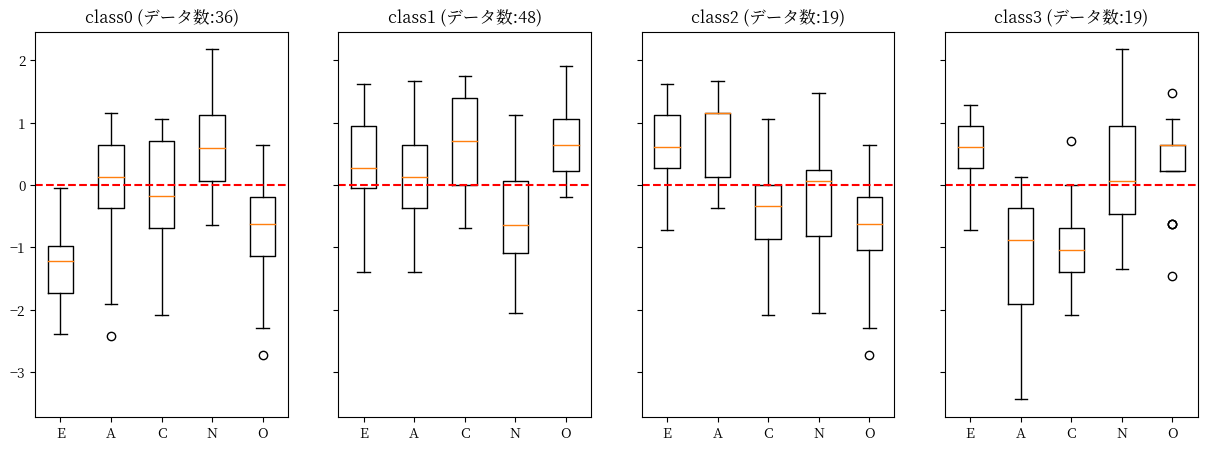

In [8]:
import os
import glob 
import sys 
sys.path.append("../")
import utils


def calc_Big5(hazumiversion, filename, third=False):
    """
    アノテータの質問回答から性格特性スコアを算出
    """
    if hazumiversion == "1911":
        filepath = "../../data/Hazumi/Hazumi1911/questionnaire/1911questionnaires.xlsx"
        df = pd.read_excel(filepath, sheet_name=4, header=1, index_col=0)
    elif hazumiversion == "2010":
        filepath = "../../data/Hazumi/Hazumi2010/questionnaire/questionnaires.xlsx"
        df = pd.read_excel(filepath, sheet_name=3, header=1, index_col=0)
    elif hazumiversion == "2012":
        filepath = "../../data/Hazumi/Hazumi2012/questionnaire/questionnaires.xlsx"
        df = pd.read_excel(filepath, sheet_name=3, header=1, index_col=0)
    data = df.loc[filename].values.tolist()
    return [data[0] + (8 - data[5]), (8-data[1]) + data[6], data[2] + (8-data[7]), data[3] + (8-data[8]), data[4] + (8-data[9])]

# 本人アノテーション
SP = {}
SP_cluster = None
vid = []

version = "1911"
files = glob.glob(f'../../data/Hazumi/Hazumi{version}/dumpfiles/*')
for file_path in tqdm(sorted(files)):
    filename = os.path.basename(file_path).split('.', 1)[0]
    vid.append(filename)
    SP[filename] = calc_Big5(version, filename)

version = "2010"
files = glob.glob(f'../../data/Hazumi/Hazumi{version}/dumpfiles/*')
for file_path in tqdm(sorted(files)):
    filename = os.path.basename(file_path).split('.', 1)[0]
    vid.append(filename)
    SP[filename] = calc_Big5(version, filename)

version = "2012"
files = glob.glob(f'../../data/Hazumi/Hazumi{version}/dumpfiles/*')
for file_path in tqdm(sorted(files)):
    filename = os.path.basename(file_path).split('.', 1)[0]
    vid.append(filename)
    SP[filename] = calc_Big5(version, filename)

SP_scaled = utils.dict_standardize(SP, vid)
SP_cluster = utils.clustering(SP_scaled, vid, n_clusters=4)

# 本人アノテーションBig5スコア
columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(SP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

for i in range(1):
    model = KMeans(n_clusters=4, random_state=0) 
    model.fit(df)
    cluster = model.labels_

    df['cluster'] = cluster
    show_boxplot(df)